<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[18차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ Harr cascade classifier 알고리즘에 대해 이해한다
        
○ Harr cascade classifier 알고리즘을 이용하여 얼굴 및 눈을 검출한다 (이미지, 동영상)
        
○ cvlib 라이브러리를 이용하여 얼굴을 검출한다     
        
○ cvlib 라이브러리를 이용하여 성별을 판별한다           
        
</font></td></tr>   
</table>

# 얼굴 검출

- 참고
  - https://learnopencv.com/face-recognition-an-introduction-for-beginners/
  - https://learnopencv.com/what-is-face-detection-the-ultimate-guide/?ck_subscriber_id=1842458982      
  - https://learnopencv.com/face-recognition-with-arcface/

## 얼굴 검출 개요

- 이미지나 영상에서 인간의 얼굴의 존재를 감지하고 위치를 찾는 작업
- 얼굴검출은 얼굴의 랜드마크 감지, 성별 분류, 얼굴 추적, 얼굴 인식 등의 작업의 시작점이라 할 수 있음
- 얼굴검출의 응용 분야 : 보안, 마케팅, 의료, 엔터테인먼트, 법 집행, 감시, 사진, 게임, 화상회의 등

<table width=600><tr><td><img src="./lecture_image/18_face_detect.jpg" width="100%"><br><center>얼굴검출</center></td><td><img src="./lecture_image/18_face_recognition.jpg" width="100%"><br><center>얼굴인식</center></td></tr></table>


## 얼굴검출의 어려운 경우
- 일부분만 보이는 경우
- 조명 : 조명이 얼굴의 부위마다 다른 경우
- 피부색이 다른 경우
- 얼굴의 방향이 다른 경우
- 얼굴의 표정이 다른 경우 
- Accessories, 화장, 문신, 수염, 마스크 등이 있는 경우
- 얼굴의 크기가 다른 경우
  
<img src="./lecture_image/18_face_detect2.png" width="60%">  


## 얼굴 검출을 위한 벤치마킹 데이터세트

- FDDB (얼굴 감지 데이터 세트 및 벤치 마크) (2010년) 
    - 5,171개의 얼굴이 있는 2,845개의 이미지로 구성
    - http://vis-www.cs.umass.edu/fddb/
- AFW (Annotated Faces in the Wild) Dataset (2012년) 
    - 468개의 얼굴이 있는 205개의 이미지로 구성
    - http://vis-www.cs.umass.edu/fddb/
- Pascal Face (2013년)
    - http://host.robots.ox.ac.uk/pascal/VOC/databases.html
    - 1,341개의 얼굴이 있는 851개의 이미지로 구성
- MALF (Multi-Attribute Labelled Faces) (2015년)
    - 12,000개의 얼굴이 있는 5,250개의 이미지로 구성
    - http://www.cbsr.ia.ac.cn/faceevaluation/
- WiderFace (2015년)
    - 393,703개의 얼굴이 있는 32,203개의 이미지로 구성
    - http://shuoyang1213.me/WIDERFACE/ 
- UFDD (Unconstrained Face Detection Dataset) (2018년)
    - 10,895개의 얼굴이 있는 6,424개의 이미지로 구성
    - https://ufdd.info/
    
## 얼굴 감지 성능 평가 도구 
  - IoU, Precision, Recall, PR 곡선, ROC 곡선, AP, MAP 등
  
## 얼굴 감지 알고리즘 및 데이터 세트의 변천사  

<img src="./lecture_image/18_face_detect3.jpg" width="80%">  

# 얼굴과 눈 검출 (Harr cascade classifier 활용)

## harrcascade 알고리즘 개요

- 참고 : https://notou10.github.io/opencv/2020/08/28/opencv_Harr_cascade.html


- Alfred Haar에 의해 1909년 제안
- 물체 특징 기반 검출 알고리즘인 Haar cascade를 이용한 얼굴 검출 
  

- 알고리즘 동작 순서
  - Haar Feature Selection
  - Creating  Integral Images
  - Adaboost Training
  - Cascading Classifiers
  

### Haar Feature 선택

- Haar Feature : 크기와 모양이 동일한 사각형들로 구성 (흰색 영역의 합 - 검은색 영역의 합으로 계산)

  <img src="./lecture_image/18_harr01.png" width="60%">
 
 
### Integral Images 생성


- 적분 이미지(integral image) : 큰 이미지라도 빠르게 지정한 영역의 픽셀의 합을 계산 
  - 기존 이미지의 너비와 높이에 1씩 더해서 더 큰 이미지를 만든 후 맨 왼쪽과 맨 위쪽은 0으로 채움
  - 이미지 픽셀값들을 왼쪽에서 오른쪽, 위쪽에서 아래쪽 방향으로 누적합을 계산

  <img src="./lecture_image/18_harr05.png" width="60%">
  <img src="./lecture_image/18_harr03.png" width="40%">
  
  
- 왼쪽에서 보이는 기존 이미지에서 영역을 지정하여 내부의 값을 구할때 적분 이미지에서 대응하는 영역의 오른쪽아래 픽셀의 값에서 위쪽 픽셀과 아래쪽 픽셀값을 빼주고 대각선 방향에 있는 픽셀을 더해줌   

  <img src="./lecture_image/18_harr04.png" width="40%">


### Adaboost Training
 
- AdaBoost(Adaptive Boost) Algorithm 
  - Classifier의 성능을 점진적으로 학습시키기 위한 (weak)classifier가 학습하는 과정에서, 틀린 data에 대해 가중치를 더 부여하여 다음 classify하는 과정에 영향을 미치게 하는 알고리즘
  
  
  - 그림의 상단 3개 박스를 좌측부터 보면, 처음 classifier인 선은 + 3개가 틀림 (첫 번째 박스)
  - 다음 과정에서 틀렸던 3 개는 가중치를 부여받고, 또 classify하면 이 때에 는 - 3개가 틀림 (두 번째 박스)
  - 마지막 학습 과정에서 역시 틀렸던 - 가 가중치를 받음.
  - 즉, 학습 과정에서 연속적으로 틀리는 +들은 더 가중치를 받고, 반면 연속적으로 맞추는 +들은 가중치가 더욱 작아지는 방식
  - 마지막으로 위 세 가지 생성한 트리들을 합치면, 하단의 박스인 classifier를 얻을 수 있음
  
  <img src="./lecture_image/18_adaboost.png" width="40%">   
 


- 이미지에서 16만개 이상 존재하는 하르 특징 중 얼굴 검출에 의미 있는 특징을 골라내는 데 Adaboost를 사용

- 배경 : 1-a feature을 씌워보면 feature 박스 안에 해당하는 값이 모두 124 정도의 값을 가질 것
- 눈썹 부분 : 1-a feature를 씌워보면 눈썹 위 피부에 해당하는 명도 값은 상대적으로 밝은 50 정도의 값을 띌 것이고, 눈썹은 상대적으로 어두운 200정도의 값을 띌 것 → 눈썹 검출
- 코 부분 : 코가 오똑 솟은 부분은 밝은 값, 팔자 주름이 있는 부분은 상대적으로 어두운 값은 가지므로 line feature을 대입해 보면 코로 검출
  
  <img src="./lecture_image/18_harr02.png" width="30%">  


- 처리 과정 
  - 초기에는 모든 하르 특징이 똑같은 가중치가 할당
  - 모든 하르 특징에 대해 학습 데이터 세트를 사용하여 분류한 결과 각 하르 특징의 에러률을 계산하고 잘못 분류하는 하르 특징에는 가중치를 증가 → 성능 좋은 하르 특징은 낮은 에러률 가짐 
  - 낮은 에러률을 보이는 하르 특징을 선택
  - 요구하는 정확성 또는 요구하는 에러율 획득 또는 요구하는 개수의 특징을 발견할 때까지 반복
  - Adaboost를 통해 16만개의 특징은 6000개의 특징으로 감소 


### Cascading Classifiers

- 이미지에 24 x 24 크기의 윈도우에 6000개의 하르 특징을 적용하여 얼굴을 검출 → 계산량이 너무 많기 때문에 비효율적
- Cascade Classifier : 윈도우가 이미지 위를 이동할 때마다 6000개의 특징을 모두 적용하지 않고 여러 단계의 그룹으로 묶어 사용 것
  - 첫번째 단계의 특징에서 얼굴 영역이 아니라는 판정이 나면 바로 다음 위치로 윈도우를 이동
  - 첫번째 단계의 특징에서 얼굴 영역이라는 판정이 내려지면 현재 윈도우가 위치한 곳에 다음 단계의 특징을 적용 


  - 알고리즘 다운로드 : https://github.com/opencv/opencv/tree/master/data/haarcascades

###  이미지에서 얼굴과 눈 추적하기

In [10]:
#실습
import cv2
import matplotlib.pyplot as plt

#모델 업로드
# 정면 얼굴 인식 모델
face_cascade=cv2.CascadeClassifier("./model/haarcascade_frontalface_default.xml")
#얼굴영역에서 눈 영역 인식 모델
eye_cascade= cv2.CascadeClassifier("./model/haarcascade_eye.xml")

[[244  89  92  92]
 [430 120  66  66]
 [509 112  86  86]
 [309 203  75  75]
 [104  67  92  92]]


(-0.5, 677.5, 450.5, -0.5)

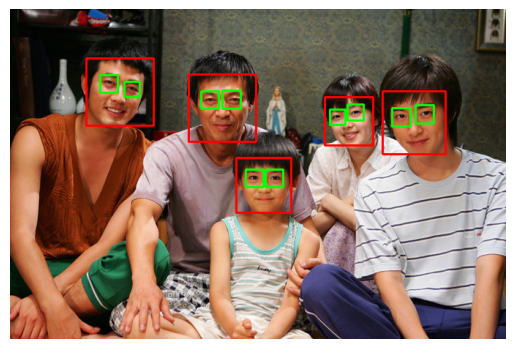

In [35]:
#실습
img=cv2.imread('./image/face.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

#scaleFactor: 검색 윈도우의 확대 비율(작은값일수록 정확, 속도가 느림)
#minNeighbors: 감지된 근처에 유사한 사각형 영역의 수 -> 사각형이 많을수록 얼굴 영역일 가능성이 높다.
#-> 값이 클수록 덜 감지되지만 정확도는 올라감 
#반환값: (x,y,w,h)
faces=face_cascade.detectMultiScale(img_gray, scaleFactor=1.4,minNeighbors=5)
print(faces)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
    # 얼굴 영역만 잘라줌 
    roi_color=img[y:y+h,x:x+w]
    roi_gray=img_gray[y:y+h, x:x+w]
    
    eyes=eye_cascade.detectMultiScale(roi_gray,scaleFactor=1.05,minNeighbors=3)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
    
plt.imshow(img)
plt.axis("off")

In [24]:
import cv2
import matplotlib.pyplot as plt

#모델 업로드
# 정면 얼굴 인식 모델
face_cascade=cv2.CascadeClassifier("./model/haarcascade_frontalface_default.xml")
#얼굴영역에서 눈 영역 인식 모델
eye_cascade= cv2.CascadeClassifier("./model/haarcascade_eye.xml")

[[480  65  64  64]
 [319 114  59  59]
 [537 121  54  54]]


(-0.5, 699.5, 536.5, -0.5)

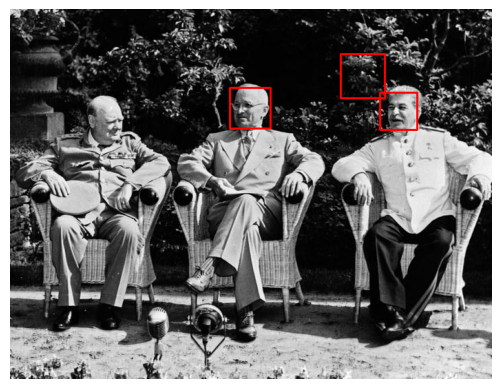

In [36]:
#실습
img=cv2.imread('./image/portdam.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

#scaleFactor: 검색 윈도우의 확대 비율(작은값일수록 정확, 속도가 느림)
#minNeighbors: 감지된 근처에 유사한 사각형 영역의 수 -> 사각형이 많을수록 얼굴 영역일 가능성이 높다.
#-> 값이 클수록 덜 감지되지만 정확도는 올라감 
#반환값: (x,y,w,h)
faces=face_cascade.detectMultiScale(img_gray, scaleFactor=1.05,minNeighbors=5)
print(faces)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
    # 얼굴 영역만 잘라줌 
    roi_color=img[y:y+h,x:x+w]
    roi_gray=img_gray[y:y+h, x:x+w]
    
    eyes=eye_cascade.detectMultiScale(roi_gray,scaleFactor=1.05,minNeighbors=3)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
    
plt.imshow(img)
plt.axis("off")

In [ ]:
mport cv2
import matplotlib.pyplot as plt
# 모델 업로드
# 정면얼굴 영역 인식 모델
face_cascade = cv2.CascadeClassifier("./model/haarcascade_frontalface_default.xml")
# 얼굴영역에서 눈 영역 인식 모델
eye_cascade = cv2.CascadeClassifier("./model/haarcascade_eye.xml")

img = cv2.imread('./image/face.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# scaleFactor : 검색 윈도우의 확대 비율 (작은값일수록 정확, 속도가 느림)
# minNeighbors : 감지된 근처에 유사한 사각형 영역의 수 -> 사각형이 많을수록 얼굴 영역일 가능성이 높다
#                -> 값이 클수록 덜 감지되지만 정확도는 올라감
# 반환값 : (x, y, w, h)
faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.4, minNeighbors=5)
print(faces)
for (x, y, w, h) in faces :
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(img)
plt.axis("off")

### 동영상에서 얼굴과 눈 추적하기

In [3]:
#실습

## 얼굴검출 (cvlib 라이브러리 활용)

- cvlib 라이브러리 : 파이썬에서 얼굴, 객체 인식을 위한 사용하기 쉬운 라이브러리

- https://www.cvlib.net/
- https://github.com/arunponnusamy/cvlib
- cvlib 라이브러리는 COCO dataset (https://cocodataset.org/) 에서 훈련된 YOLO 모델을 제공

- 80 종류의 물체를 검출

In [27]:
!pip install cvlib

In [28]:
!pip install tensorflow

[[79, 118, 139, 164], [411, 144, 469, 189], [499, 106, 569, 165], [257, 95, 322, 155]]
[0.9992379, 0.98549783, 0.98285216, 0.96025676]


(-0.5, 639.5, 426.5, -0.5)

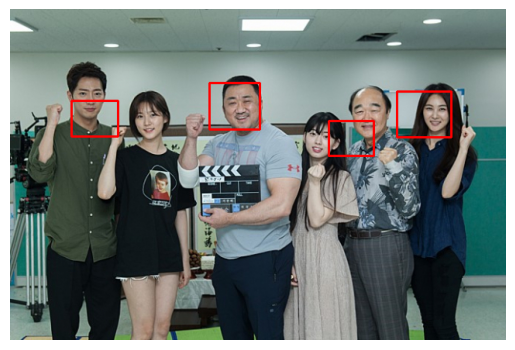

In [42]:
#실습
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt

img = cv2.imread('./image/face3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces,conf=cv.detect_face(img)

print(faces)
print(conf)
for face in faces :
    cv2.rectangle(img, (face[0], face[1]), (face[2], face[3]), (255, 0, 0), 2)
plt.imshow(img)
plt.axis("off")

In [43]:
import cvlib as cv
print(cv.__version__)

0.2.7


## 성별인식 (cvlib 라이브러리)

In [7]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[18차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ harrcascade 알고리즘 동작 순서
  - Haar Feature Selection : 크기와 모양이 동일한 사각형들로 구성 (흰색 영역의 합 - 검은색 영역의 합으로 계산)
  - Creating Integral Images : 큰 이미지라도 빠르게 지정한 영역의 픽셀의 합을 계산
  - Adaboost Training : Classifier의 성능을 점진적으로 학습시키기 위한 (weak)classifier가 학습하는 과정에서, 틀린 data에 대해 가중치를 더 부여하여 다음 classify하는 과정에 영향을 미치게 하는 알고리즘
  - Cascading Classifiers : 윈도우가 이미지 위를 이동할 때마다 6000개의 특징을 모두 적용하지 않고 여러 단계의 그룹으로 묶어 사용 것           
</font></td></tr>   
</table>